In [240]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras import Sequential
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import array
import pandas as pd
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

In [241]:
def embedding(output):
    df = pd.read_excel('data.xlsx')
    print(df)
    df = shuffle(df)
    x_y = list(zip(df['text'].tolist(), df['label'].tolist()))[:]
    docs = array([x[0] for x in x_y])
    # class labels
    labels = array([x[1] for x in x_y])
    # embedding
    vocab_size = 50
    encoded_docs = [one_hot(d, vocab_size) for d in docs]
    # pad documents to a max length of 20 words
    max_length = 20
    padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    if output == 'x':
        return padded_docs
    elif output == 'y':
        return labels

In [263]:
X = array([e for e in embedding('x')])
Y = array([l for l in embedding('y')])

trainX = X[:45]
trainY = Y[:45]
testX = X[45:]
testY = Y[45:]

                                                 text  label
0    Why aren't you guys dressed?We have a half hour.    1.0
1                          Man, I am so beat.Oh yeah.    1.0
2                       That was so lameI know, yeah.    1.0
3               Let's never speak of this.You got it.    1.0
4           Morning. Morning, hey, you made pancakes?    1.0
5      Nope, not this time.Come on, quite yankin' me.    1.0
6                 Hey.Hey, how's the first day goin'?    1.0
7                           Okay, one question.Shoot.    1.0
8      Can I talk to you for a secondSure. What's up?    1.0
9                                   Hey you guys.Hey.    1.0
10  So how you two gettin' along?Oh, I couldn't be...    1.0
11                               You wanna come?Yeah!    1.0
12        We’ll be there.Great. I’ll ah, see ya then.    1.0
13               Do you have any beers?Help yourself.    1.0
14  Would you like some juice?I’d love some juice....    1.0
15     It’s good to see 

In [271]:
def controller():
    # reshape data
    X_reshape = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

    n_dims = X.shape[1]

    model = Sequential()
    model.add(LSTM(1, input_shape=(1, n_dims), activation='relu'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    history = model.fit(X_reshape, trainY, epochs=200, batch_size=10)
    
    #results = model.evaluate(testX, testY)
    
    model.summary()


    # visualize loss
    plt.plot(history.history['loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

Epoch 1/200
55/55 [==============================] - 10s 186ms/step - loss: 2.2512
Epoch 2/200
55/55 [==============================] - 0s 802us/step - loss: 1.9037
Epoch 3/200
55/55 [==============================] - 0s 587us/step - loss: 1.7099
Epoch 4/200
55/55 [==============================] - 0s 581us/step - loss: 1.5192
Epoch 5/200
55/55 [==============================] - 0s 579us/step - loss: 1.2737
Epoch 6/200
55/55 [==============================] - 0s 579us/step - loss: 1.1855
Epoch 7/200
55/55 [==============================] - 0s 576us/step - loss: 0.9706
Epoch 8/200
55/55 [==============================] - 0s 559us/step - loss: 0.8500
Epoch 9/200
55/55 [==============================] - 0s 642us/step - loss: 0.7979
Epoch 10/200
55/55 [==============================] - 0s 594us/step - loss: 0.7011
Epoch 11/200
55/55 [==============================] - 0s 608us/step - loss: 0.6042
Epoch 12/200
55/55 [==============================] - 0s 599us/step - loss: 0.5575
Epoch 13/200

55/55 [==============================] - 0s 719us/step - loss: 0.3909
Epoch 100/200
55/55 [==============================] - 0s 704us/step - loss: 0.3909
Epoch 101/200
55/55 [==============================] - 0s 699us/step - loss: 0.3909
Epoch 102/200
55/55 [==============================] - 0s 687us/step - loss: 0.3909
Epoch 103/200
55/55 [==============================] - 0s 645us/step - loss: 0.3909
Epoch 104/200
55/55 [==============================] - 0s 625us/step - loss: 0.3909
Epoch 105/200
55/55 [==============================] - 0s 592us/step - loss: 0.3909
Epoch 106/200
55/55 [==============================] - 0s 594us/step - loss: 0.3909
Epoch 107/200
55/55 [==============================] - 0s 610us/step - loss: 0.3909
Epoch 108/200
55/55 [==============================] - 0s 597us/step - loss: 0.3909
Epoch 109/200
55/55 [==============================] - 0s 639us/step - loss: 0.3909
Epoch 110/200
55/55 [==============================] - 0s 683us/step - loss: 0.3909
Epoch 

55/55 [==============================] - 0s 652us/step - loss: 0.3909
Epoch 197/200
55/55 [==============================] - 0s 634us/step - loss: 0.3909
Epoch 198/200
55/55 [==============================] - 0s 620us/step - loss: 0.3909
Epoch 199/200
55/55 [==============================] - 0s 629us/step - loss: 0.3909
Epoch 200/200
55/55 [==============================] - 0s 658us/step - loss: 0.3909
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 1)                 88        
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


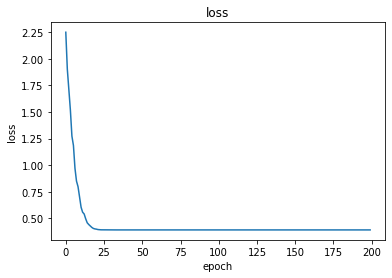

In [272]:
controller()